<a href="https://colab.research.google.com/github/lokesh89414/SQLite-Database-using-Python-Elevate-lab-Task-7/blob/main/SQLite_Database_using_Python_Elevate_lab_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **🗂️ Task Overview**
  
  We’ll:
  1.   Create a SQLite database (sales_data.db) with a detailed sales table
  2.   Populate it with more realistic sales data.
  3.   Run SQL queries to get total quantity and revenue per product.
  4.   Load results into a pandas DataFrame.
  5.   Create a bar chart to visualize product revenue.

**📘 1. Import Required Libraries**

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


**🛠️ 2. Create a More Detailed Sales Table and Insert Data**

We’ll add more records and diverse products to simulate a realistic dataset.

In [5]:
# Connect to SQLite (creates database if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop table if it exists (for re-runs)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create sales table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT,
    region TEXT
)
""")

# Insert more detailed sample data
sales_data = [
    ("Apple", 10, 1.5, "2025-06-01", "North"),
    ("Banana", 20, 0.5, "2025-06-01", "North"),
    ("Orange", 15, 0.8, "2025-06-02", "South"),
    ("Apple", 5, 1.5, "2025-06-02", "South"),
    ("Banana", 10, 0.5, "2025-06-03", "East"),
    ("Grapes", 25, 2.0, "2025-06-03", "East"),
    ("Apple", 7, 1.5, "2025-06-04", "West"),
    ("Orange", 10, 0.8, "2025-06-05", "North"),
    ("Banana", 12, 0.5, "2025-06-06", "South"),
    ("Grapes", 30, 2.0, "2025-06-06", "West")
]

cursor.executemany("INSERT INTO sales (product, quantity, price, date, region) VALUES (?, ?, ?, ?, ?)", sales_data)

conn.commit()
conn.close()

print("Sales table created and data inserted!")


Sales table created and data inserted!


**🔍 3. Run SQL Query to Get Sales Summary**

We’ll calculate:

* Total Quantity Sold

* Total Revenue (quantity * price)

* Grouped by product

In [6]:
# Reconnect
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Read query result into pandas DataFrame
df_summary = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display summary
print("🧾 Sales Summary (by Product):")
display(df_summary)


🧾 Sales Summary (by Product):


,product,total_quantity,total_revenue
0,Grapes,55,110.0
1,Apple,22,33.0
2,Banana,42,21.0
3,Orange,25,20.0


**📊 4. Plot Bar Chart of Revenue by Product**

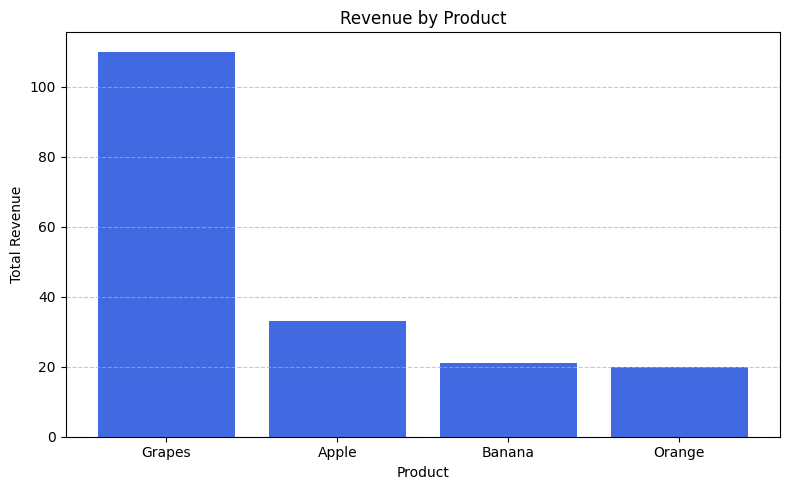

In [7]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_summary['product'], df_summary['total_revenue'], color='royalblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Plot Quantity Sold by Product**

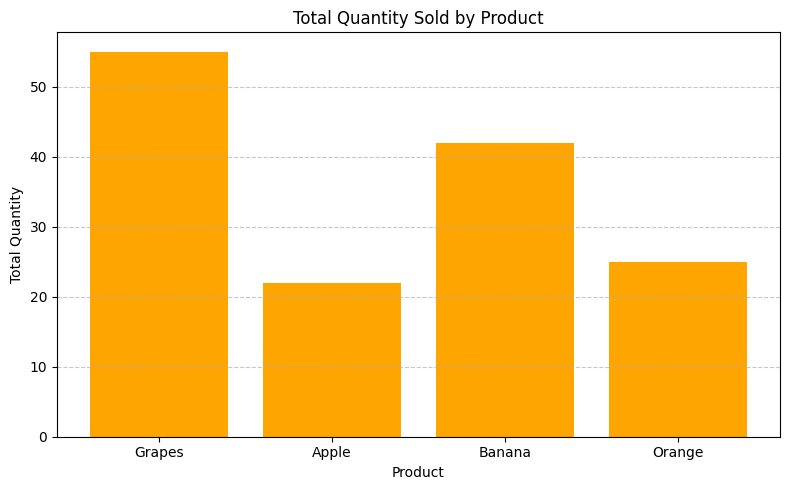

In [8]:
# Plot quantity
plt.figure(figsize=(8, 5))
plt.bar(df_summary['product'], df_summary['total_quantity'], color='orange')
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**🔍 5. Add Filters by Region or Date**

Let’s add region and date columns to our data (if not already added). Then, we can filter based on them.

*A. Add region and date to the table*

In [9]:
# Recreate database with more detailed data
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT,
    region TEXT
)
""")

# Insert richer data
sales_data = [
    ("Apple", 10, 1.5, "2025-06-01", "North"),
    ("Banana", 20, 0.5, "2025-06-01", "North"),
    ("Orange", 15, 0.8, "2025-06-02", "South"),
    ("Apple", 5, 1.5, "2025-06-02", "South"),
    ("Banana", 10, 0.5, "2025-06-03", "East"),
    ("Grapes", 25, 2.0, "2025-06-03", "East"),
    ("Apple", 7, 1.5, "2025-06-04", "West"),
    ("Orange", 10, 0.8, "2025-06-05", "North"),
    ("Banana", 12, 0.5, "2025-06-06", "South"),
    ("Grapes", 30, 2.0, "2025-06-06", "West")
]

cursor.executemany("INSERT INTO sales (product, quantity, price, date, region) VALUES (?, ?, ?, ?, ?)", sales_data)
conn.commit()
conn.close()


*B. Query with a region filter*

In [10]:
import pandas as pd

conn = sqlite3.connect("sales_data.db")

region = "North"  # You can change to "South", "East", or "West"
query_region = f"""
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
WHERE region = '{region}'
GROUP BY product
"""

df_region = pd.read_sql_query(query_region, conn)
conn.close()

print(f"🧾 Sales Summary for Region: {region}")
print(df_region)


🧾 Sales Summary for Region: North
  product  total_qty  revenue
0   Apple         10     15.0
1  Banana         20     10.0
2  Orange         10      8.0


**📅 2. Create Monthly Trends**

  Group by month using the strftime function in SQLite.

📅 Monthly Revenue Trends:
     month  total_revenue
0  2025-06          184.0


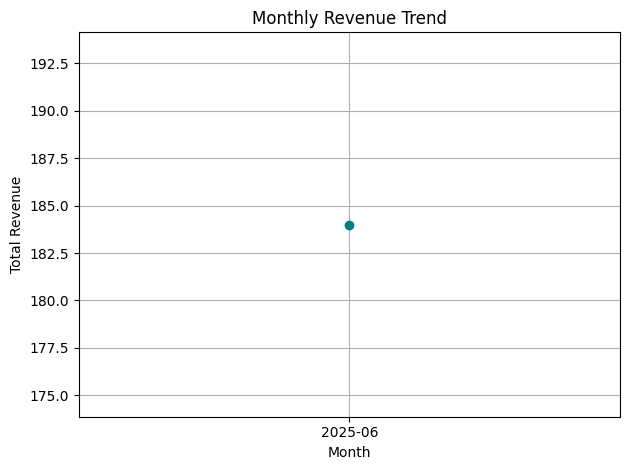

In [11]:
conn = sqlite3.connect("sales_data.db")

query_monthly = """
SELECT strftime('%Y-%m', date) AS month,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month
"""

df_monthly = pd.read_sql_query(query_monthly, conn)
conn.close()

print("📅 Monthly Revenue Trends:")
print(df_monthly)

# Plot monthly revenue trend
import matplotlib.pyplot as plt

plt.plot(df_monthly['month'], df_monthly['total_revenue'], marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


**💾 3. Export Summary to CSV**

Export any DataFrame like this:

In [12]:
# Save region summary to CSV
df_region.to_csv("region_sales_summary.csv", index=False)

# Save monthly trend to CSV
df_monthly.to_csv("monthly_revenue_trend.csv", index=False)

print("✅ CSV files exported successfully.")


✅ CSV files exported successfully.


**✅ Final Sales Analysis Script**

In [13]:
# Step 1: Imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create database and insert detailed sales data
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT,
    region TEXT
)
""")

sales_data = [
    ("Apple", 10, 1.5, "2025-06-01", "North"),
    ("Banana", 20, 0.5, "2025-06-01", "North"),
    ("Orange", 15, 0.8, "2025-06-02", "South"),
    ("Apple", 5, 1.5, "2025-06-02", "South"),
    ("Banana", 10, 0.5, "2025-06-03", "East"),
    ("Grapes", 25, 2.0, "2025-06-03", "East"),
    ("Apple", 7, 1.5, "2025-06-04", "West"),
    ("Orange", 10, 0.8, "2025-06-05", "North"),
    ("Banana", 12, 0.5, "2025-06-06", "South"),
    ("Grapes", 30, 2.0, "2025-06-06", "West")
]

cursor.executemany("INSERT INTO sales (product, quantity, price, date, region) VALUES (?, ?, ?, ?, ?)", sales_data)
conn.commit()
conn.close()


**🔍 Filter Sales by Region**

🧾 Sales Summary for Region: North
  product  total_qty  revenue
0   Apple         10     15.0
1  Banana         20     10.0
2  Orange         10      8.0


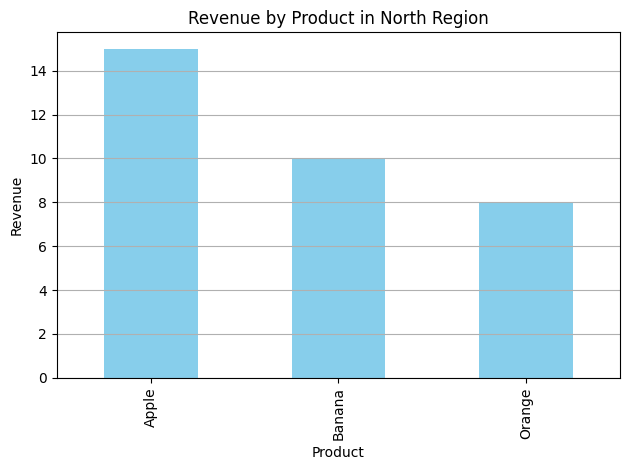

In [14]:
region = "North"  # Change to "South", "East", or "West"
conn = sqlite3.connect("sales_data.db")

query_region = f"""
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
WHERE region = '{region}'
GROUP BY product
"""

df_region = pd.read_sql_query(query_region, conn)
print(f"🧾 Sales Summary for Region: {region}")
print(df_region)

# Plot
df_region.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title(f"Revenue by Product in {region} Region")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


**📅 Monthly Revenue Trend**

📅 Monthly Revenue Trends
     month  total_revenue
0  2025-06          184.0


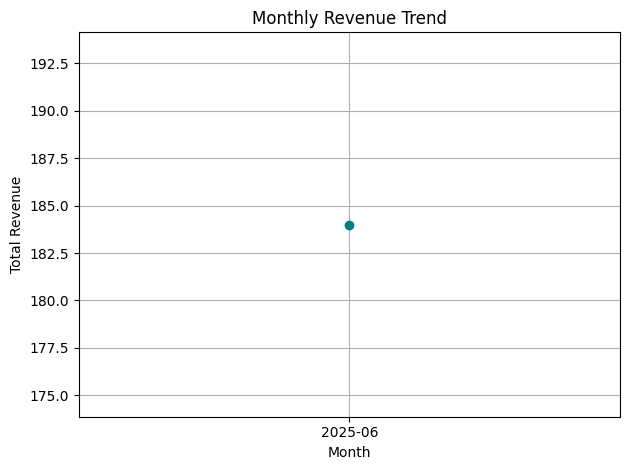

In [15]:
query_monthly = """
SELECT strftime('%Y-%m', date) AS month,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month
"""

df_monthly = pd.read_sql_query(query_monthly, conn)
conn.close()

print("📅 Monthly Revenue Trends")
print(df_monthly)

plt.plot(df_monthly['month'], df_monthly['total_revenue'], marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
df_region.to_csv("region_sales_summary.csv", index=False)
df_monthly.to_csv("monthly_revenue_trend.csv", index=False)
print("✅ CSV files exported successfully!")


✅ CSV files exported successfully!
